In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import mne
from util import load_subjects_list
from const import BASE_WORKDIR, EVOKED_FULL_FNAME

In [7]:
N_CHS = 5

def decompose(evoked, sign, latency_window):
    channels = {}
    evoked_crop = evoked.copy().crop(*latency_window)
    mean_amp = np.mean(evoked_crop.data, axis=1)
    sorted_channels = np.argsort(mean_amp) if sign == 'N' else np.argsort(mean_amp)[::-1]
    component_chs = [evoked.ch_names[i] for i in sorted_channels[:N_CHS]]
    return evoked.pick(picks=component_chs)

def p100(evoked):
    return decompose(evoked, 'P', (0.05, 0.15))

def p200(evoked):
    return decompose(evoked, 'P', (0.15, 0.25))

def p300(evoked):
    return decompose(evoked, 'P', (0.25, 0.35))

def p600(evoked):
    return decompose(evoked, 'P', (0.5, 0.8))

def n100(evoked):
    return decompose(evoked, 'N', (0.07, 0.13))

def n200(evoked):
    return decompose(evoked, 'N', (0.15, 0.25))

def n400(evoked):
    return decompose(evoked, 'N', (0.35, 0.45))

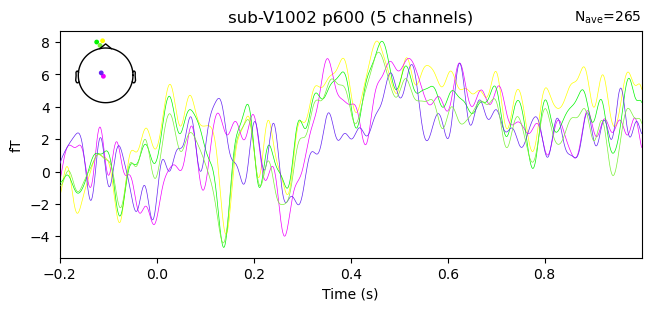

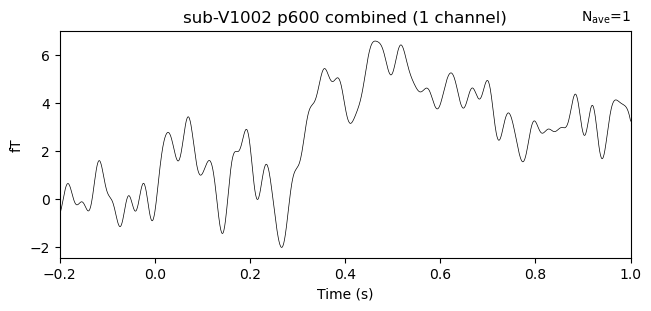

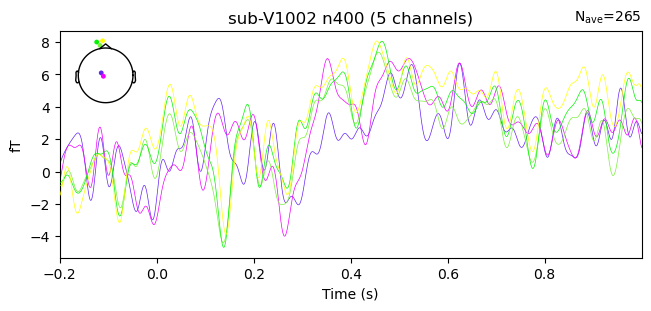

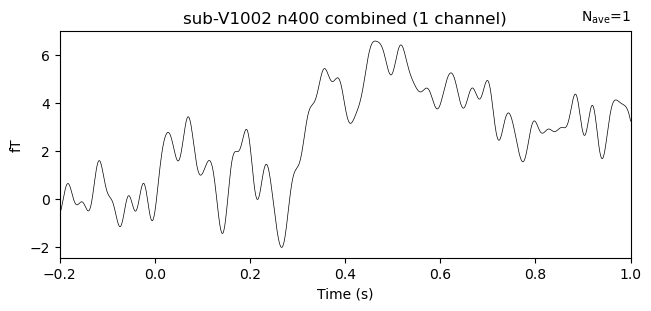

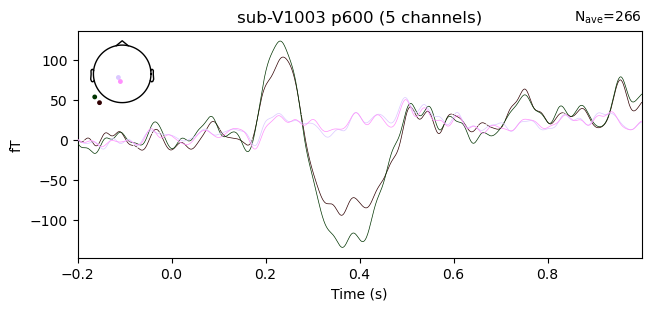

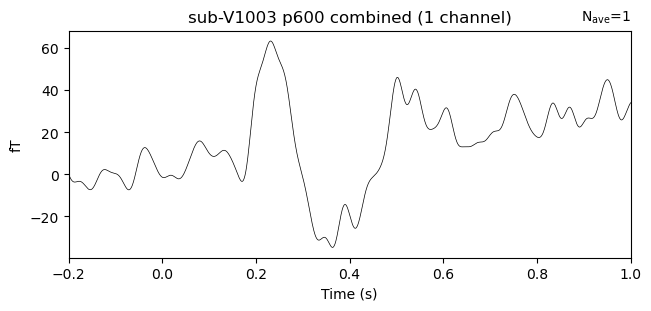

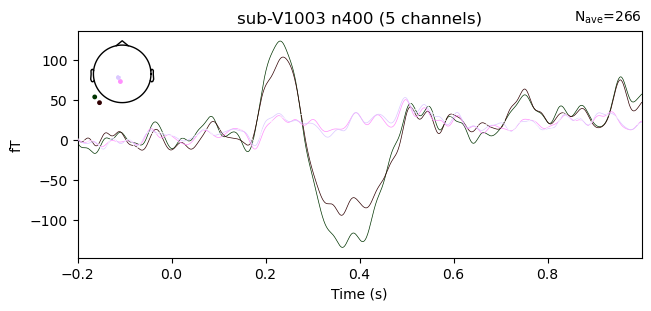

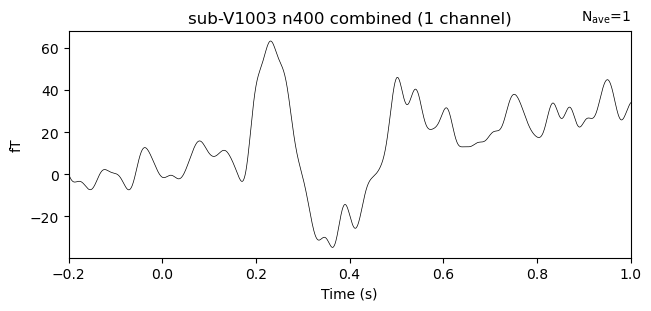

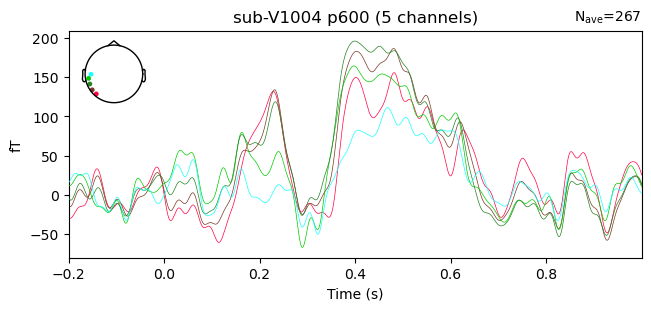

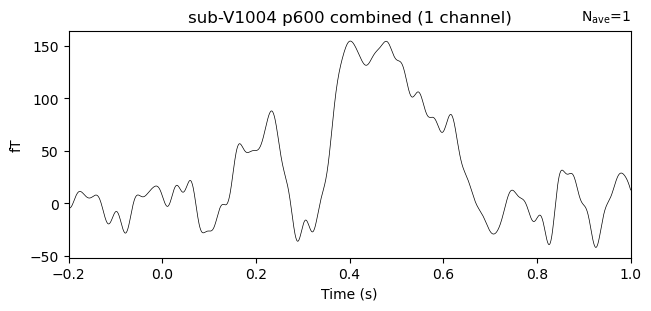

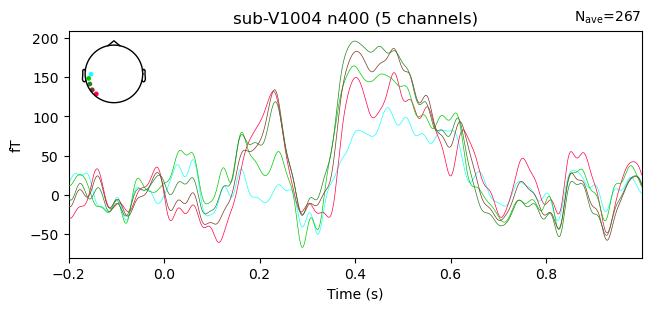

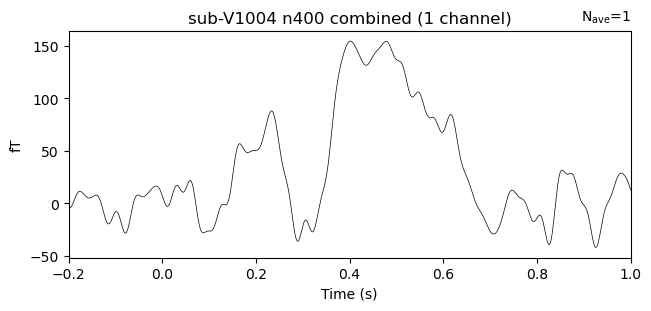

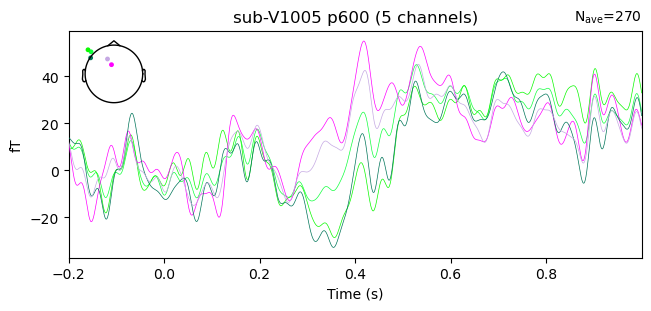

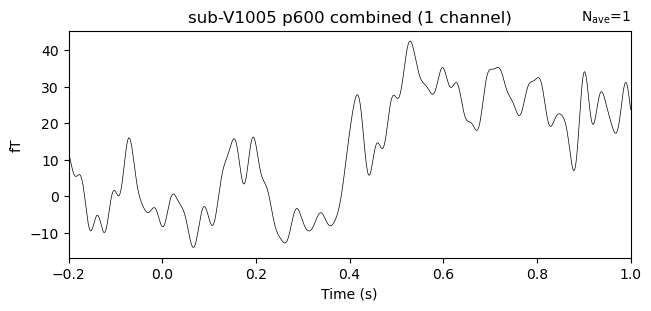

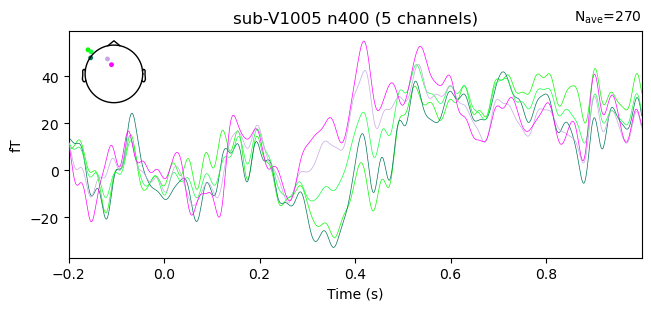

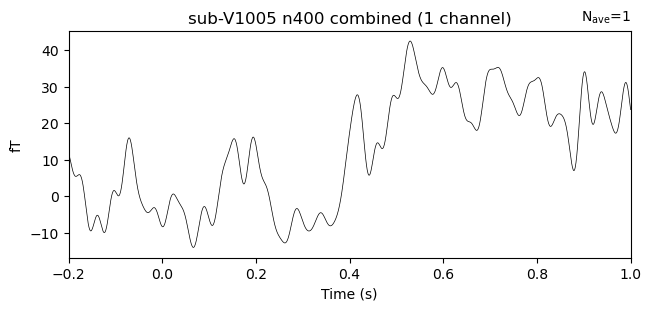

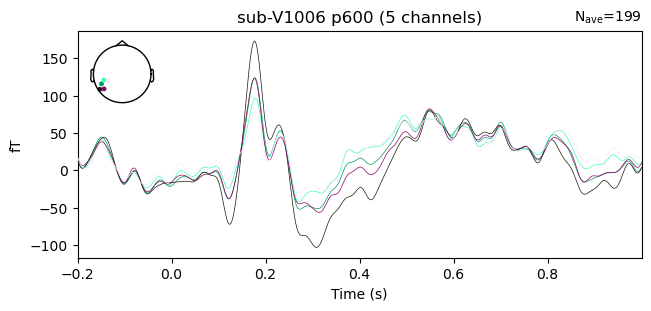

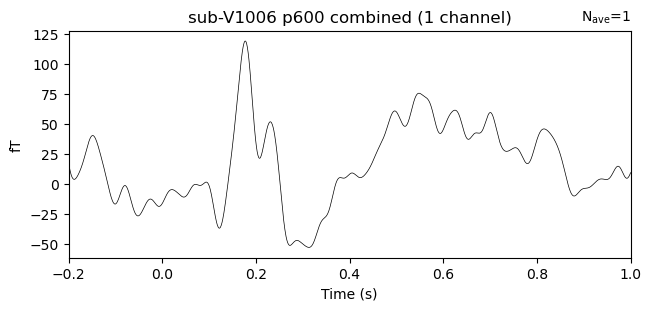

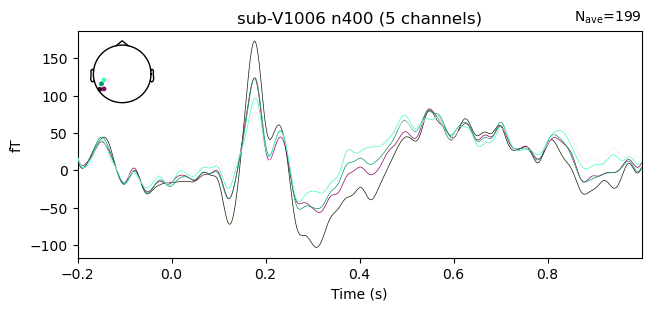

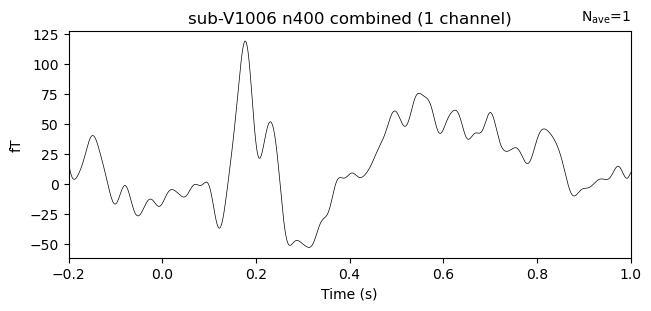

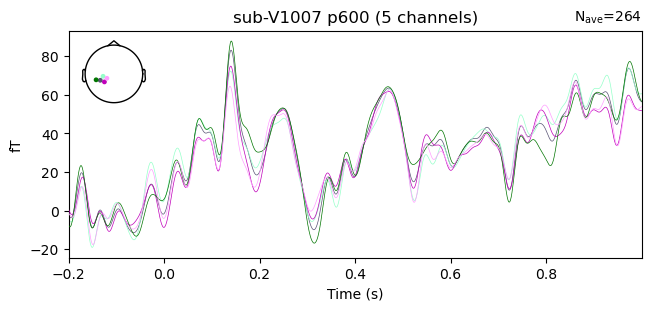

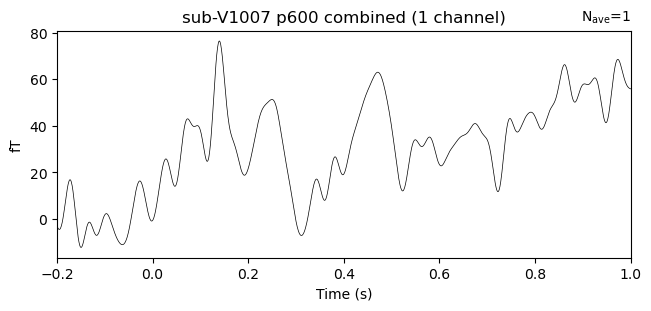

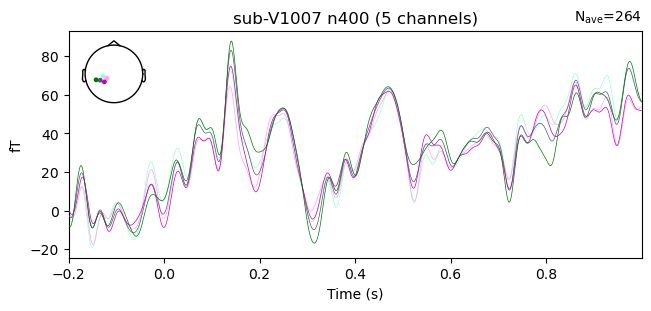

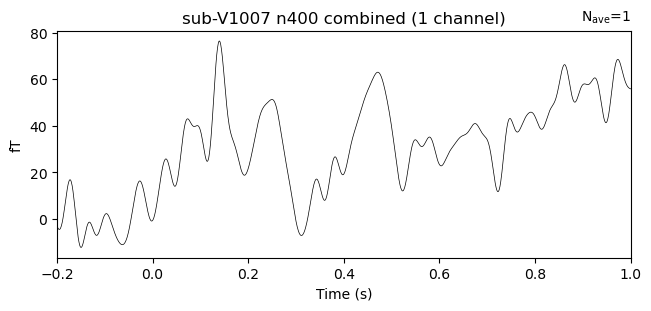

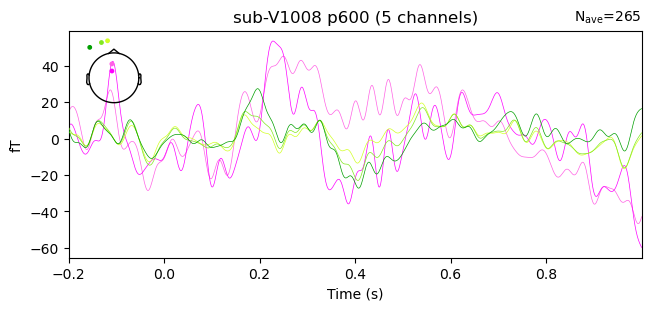

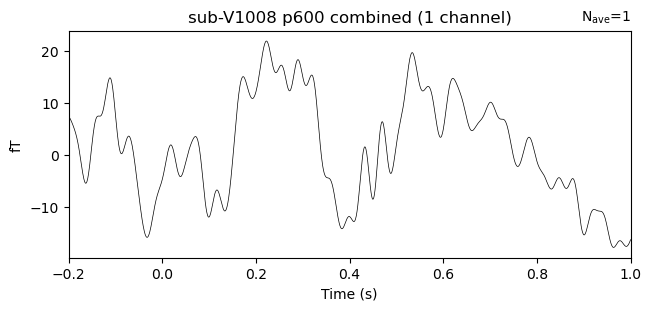

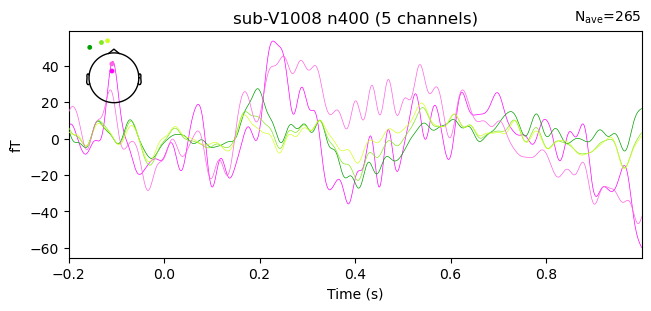

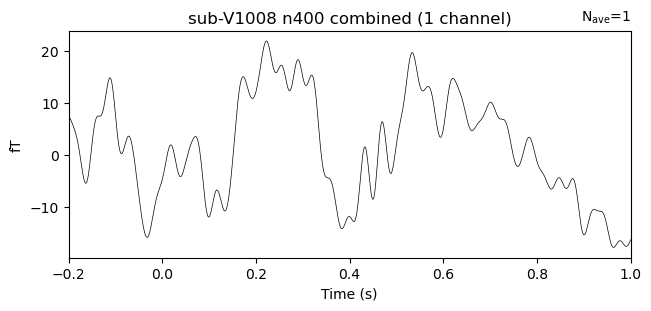

In [15]:
ROI = 'ML' # Region of interest - Left Temporal
for subj in load_subjects_list():
    evoked = mne.read_evokeds(f"{BASE_WORKDIR}/{subj}/{EVOKED_FULL_FNAME}", verbose='ERROR')[0]
    evoked.pick(picks=[c for c in evoked.info.ch_names if c.startswith(ROI)])
    #p100(evoked).plot(titles=f"{subj} p100")
    #p200(evoked).plot(titles=f"{subj} p200")
    #p300(evoked).plot(titles=f"{subj} p300")
    evoked_p600 = p600(evoked)
    evoked_p600.plot(titles=f"{subj} p600")
    evoked_p600_groups=dict(a=[x for x, i in enumerate(evoked_p600.ch_names)])
    p600_combined = mne.channels.combine_channels(evoked_p600, evoked_p600_groups, method="mean", verbose="ERROR")
    p600_combined.plot(titles=f"{subj} p600 combined", verbose="ERROR")
    #n100(evoked).plot(titles=f"{subj} n100")
    #n200(evoked).plot(titles=f"{subj} n200")
    evoked_n400 = n400(evoked)
    evoked_n400.plot(titles=f"{subj} n400")
    evoked_n400_groups=dict(a=[x for x, i in enumerate(evoked_n400.ch_names)])
    n400_combined = mne.channels.combine_channels(evoked_n400, evoked_n400_groups, method="mean", verbose="ERROR")
    n400_combined.plot(titles=f"{subj} n400 combined", verbose="ERROR")